In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
data=pd.read_csv('titanic.csv')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(data.info())
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch    

In [ ]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# Data Cleaning
# Drop irrelevant columns
data = data.drop(['class', 'who', 'adult_male', 'alive', 'deck', 'embark_town'], axis=1)

# Fill missing Age with median
data['age'].fillna(data['age'].median(), inplace=True)

# Fill missing embarked with the mode
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Check again for missing values
print(data.isnull().sum())


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


<ipython-input-5-deabbaa95316>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-5-deabbaa95316>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

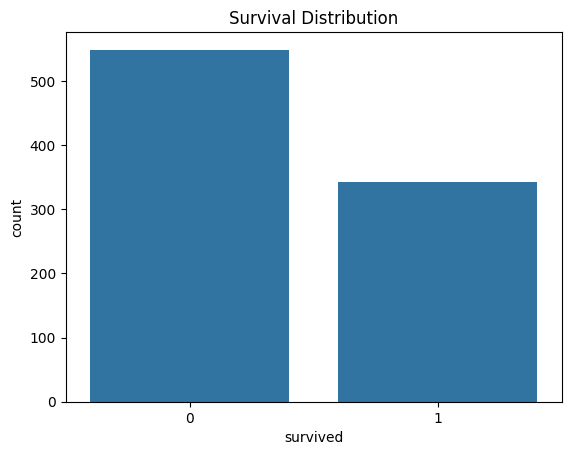

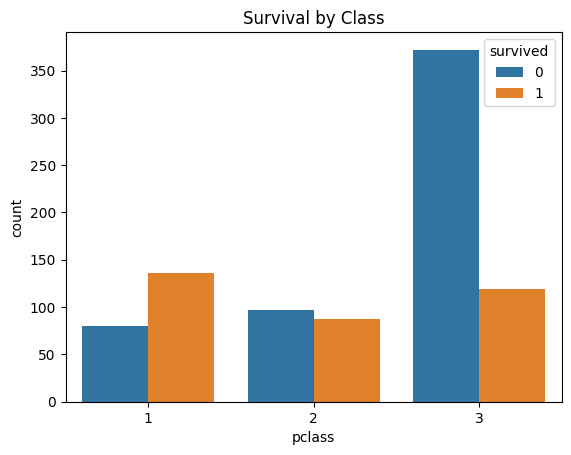

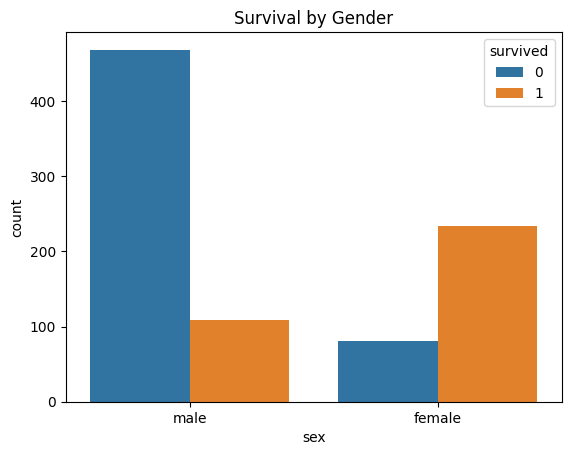

In [ ]:
#data visualization
# Survival distribution
sns.countplot(x='survived', data=data)
plt.title('Survival Distribution')
plt.show()

# Survival by class
sns.countplot(x='pclass', hue='survived', data=data)
plt.title('Survival by Class')
plt.show()

# Survival by gender
sns.countplot(x='sex', hue='survived', data=data)
plt.title('Survival by Gender')
plt.show()


In [ ]:
# Feature Encoding
# Encode 'sex'
data['sex'] = LabelEncoder().fit_transform(data['sex'])

# Encode 'embarked' using one-hot encoding
data = pd.get_dummies(data, columns=['embarked'], drop_first=True)

# Display the updated dataset
print(data.head())



   survived  pclass  sex   age  sibsp  parch     fare  alone  embarked_Q  \
0         0       3    1  22.0      1      0   7.2500  False       False   
1         1       1    0  38.0      1      0  71.2833  False       False   
2         1       3    0  26.0      0      0   7.9250   True       False   
3         1       1    0  35.0      1      0  53.1000  False       False   
4         0       3    1  35.0      0      0   8.0500   True       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [ ]:
# Define features and target
X = data.drop('survived', axis=1)
y = data['survived']


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.81


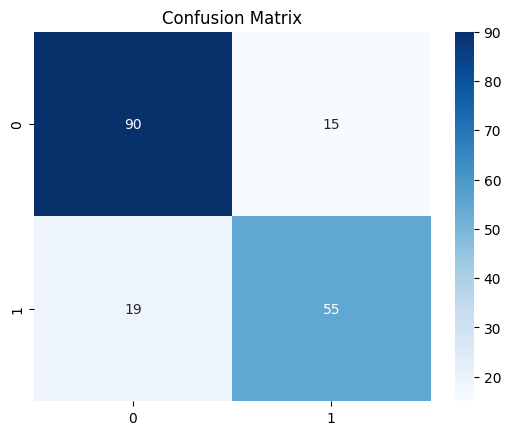

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
